In [222]:
from numpy import loadtxt
from sklearn.model_selection import train_test_split
import keras
from sklearn.metrics import confusion_matrix , classification_report, precision_score, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
from google.colab import drive
from sklearn.metrics import classification_report
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [223]:
data = pd.read_csv("/content/drive/MyDrive/AI Final/bank-data/bank-full.csv", delimiter=';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [224]:
categoricalFeatures = [feature for feature in data.columns if ((data[feature].dtypes=='O')&(feature not in ['y']))]
print('Categorical Features Length : {}'.format(len(categoricalFeatures)))
categoricalFeatures

Categorical Features Length : 9


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

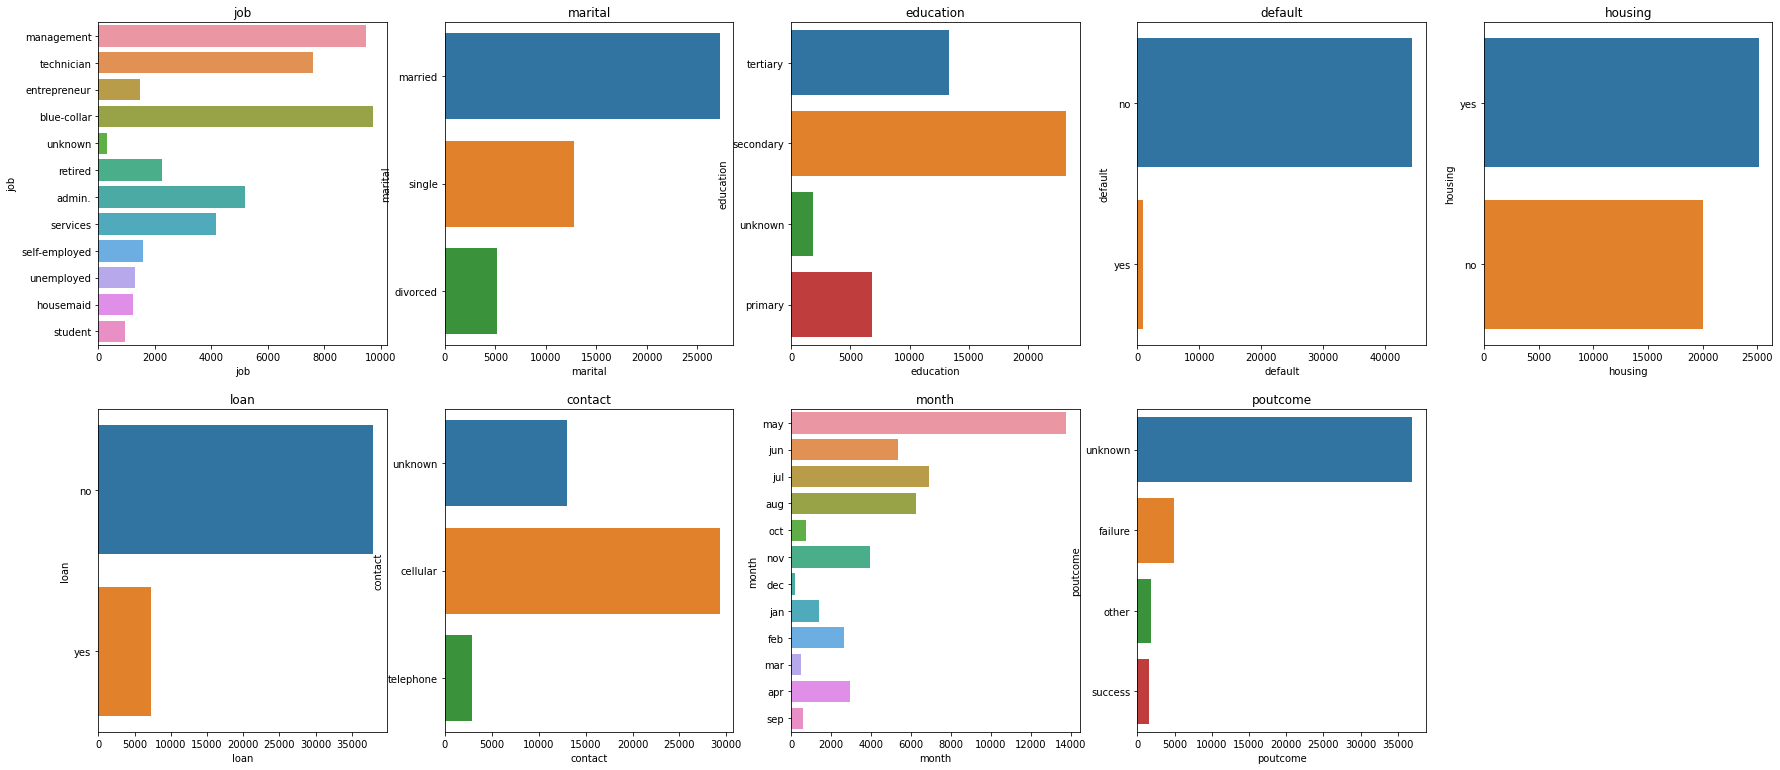

In [225]:
plt.figure(figsize=(30,70))
plotnumber =1
for categoricalFeature in categoricalFeatures:
    ax = plt.subplot(10,5,plotnumber)
    sns.countplot(y=categoricalFeature,data=data)
    plt.xlabel(categoricalFeature)
    plt.title(categoricalFeature)
    plotnumber+=1
plt.show()

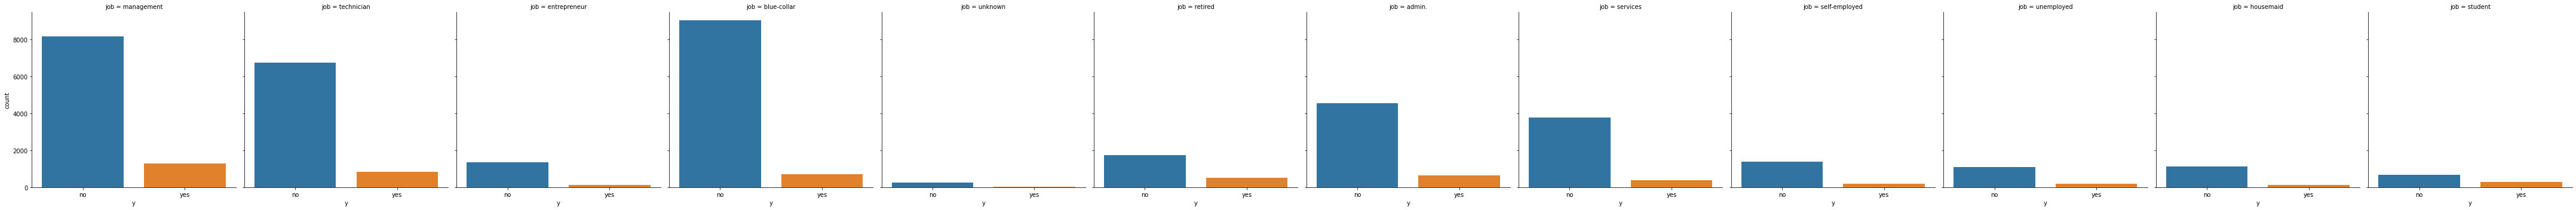

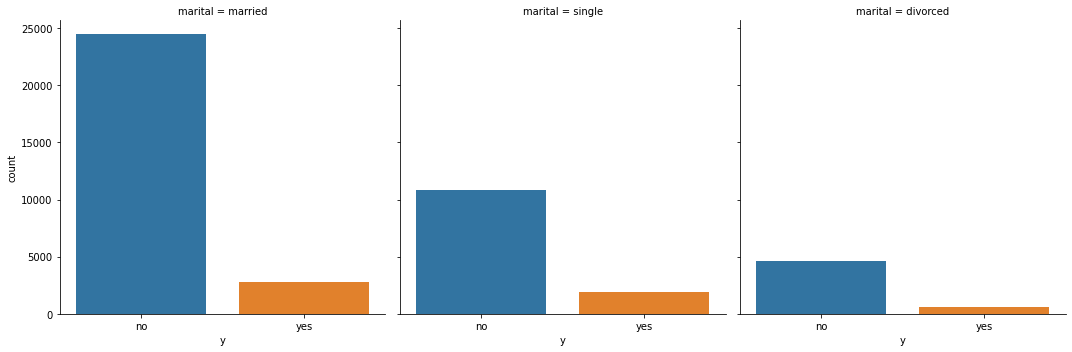

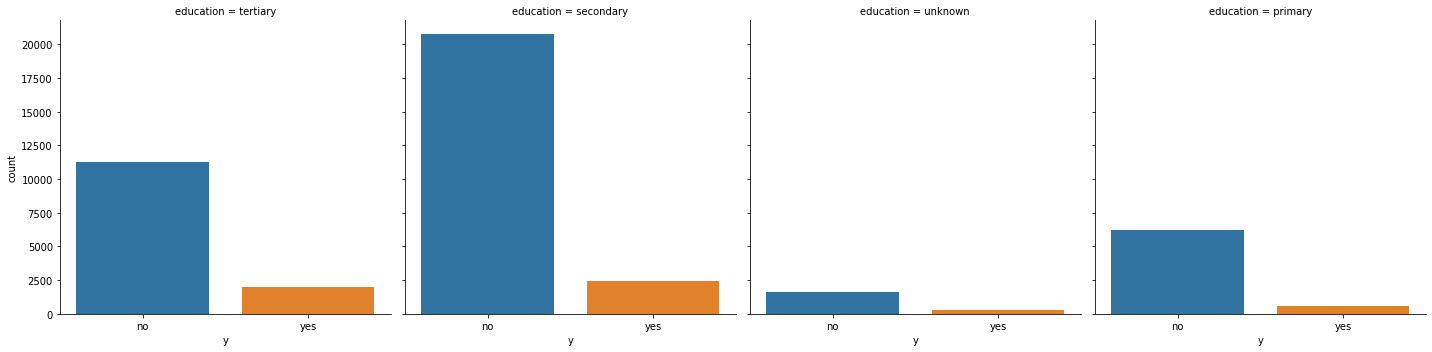

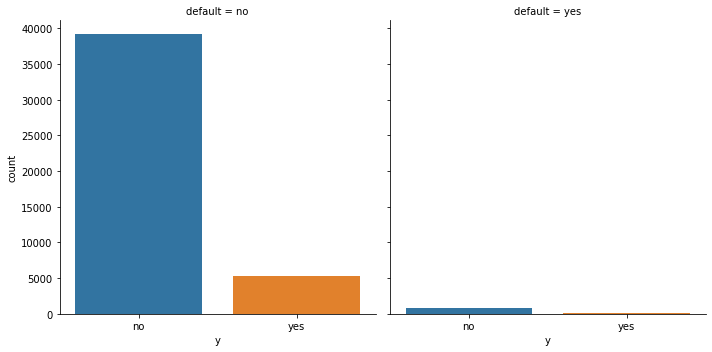

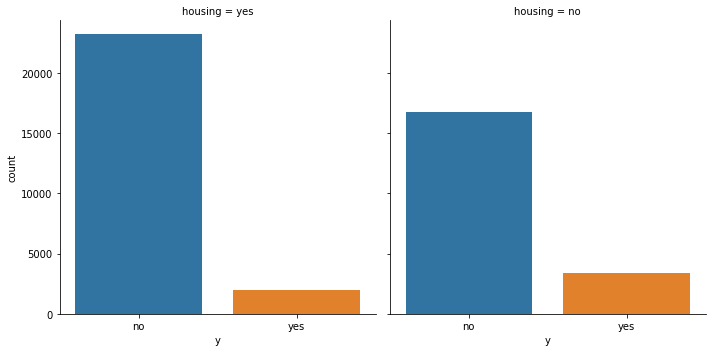

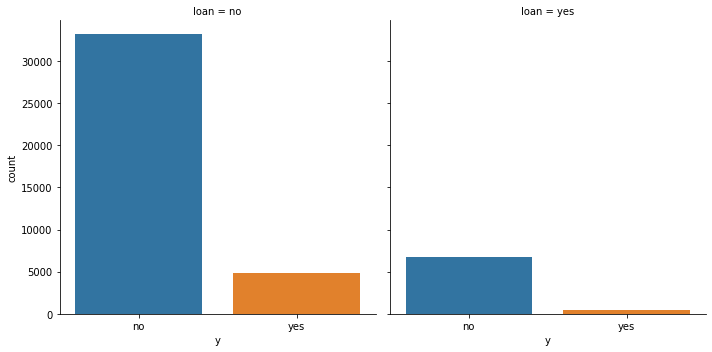

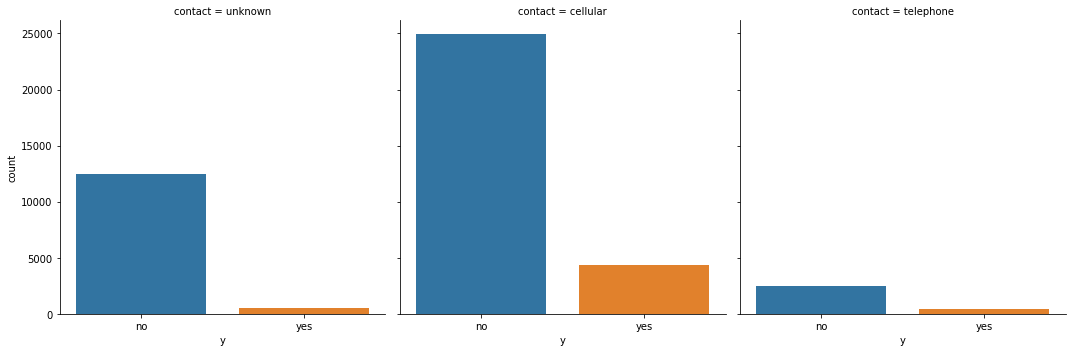

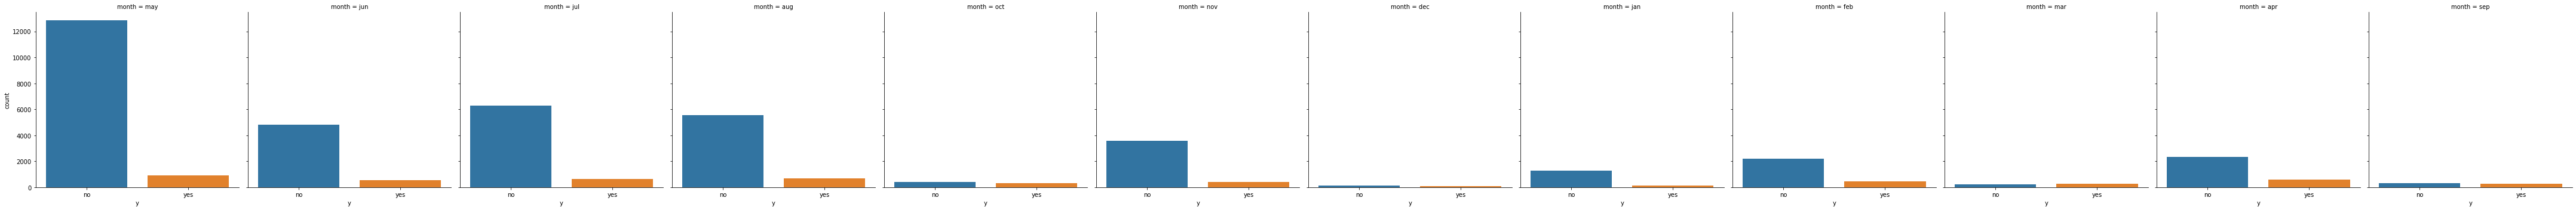

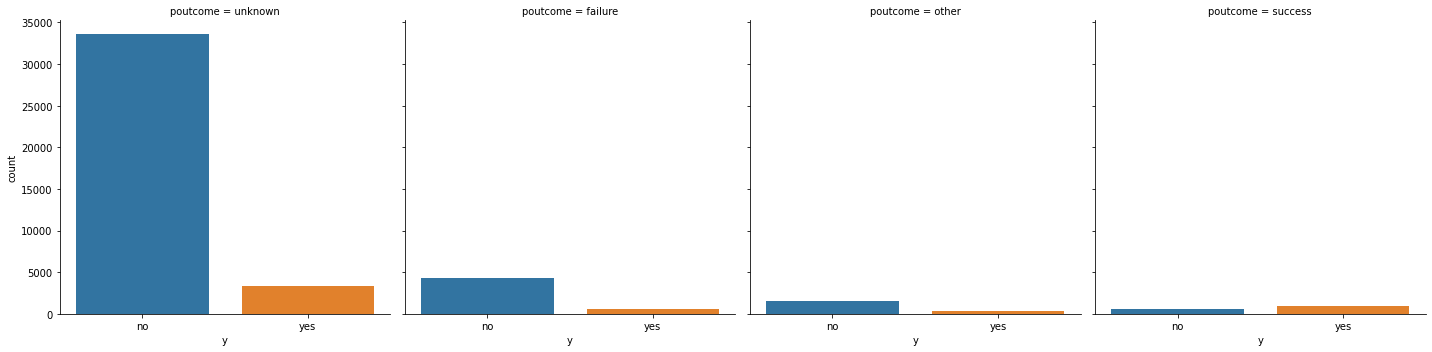

In [226]:
for categoricalFeature in categoricalFeatures:
    sns.catplot(x='y', col=categoricalFeature, kind='count', data  = data)
plt.show()

In [227]:
numericalFeatures = [feature for feature in data.columns if ((data[feature].dtypes!='O')&(feature not in ['y']))]
numericalFeatures

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

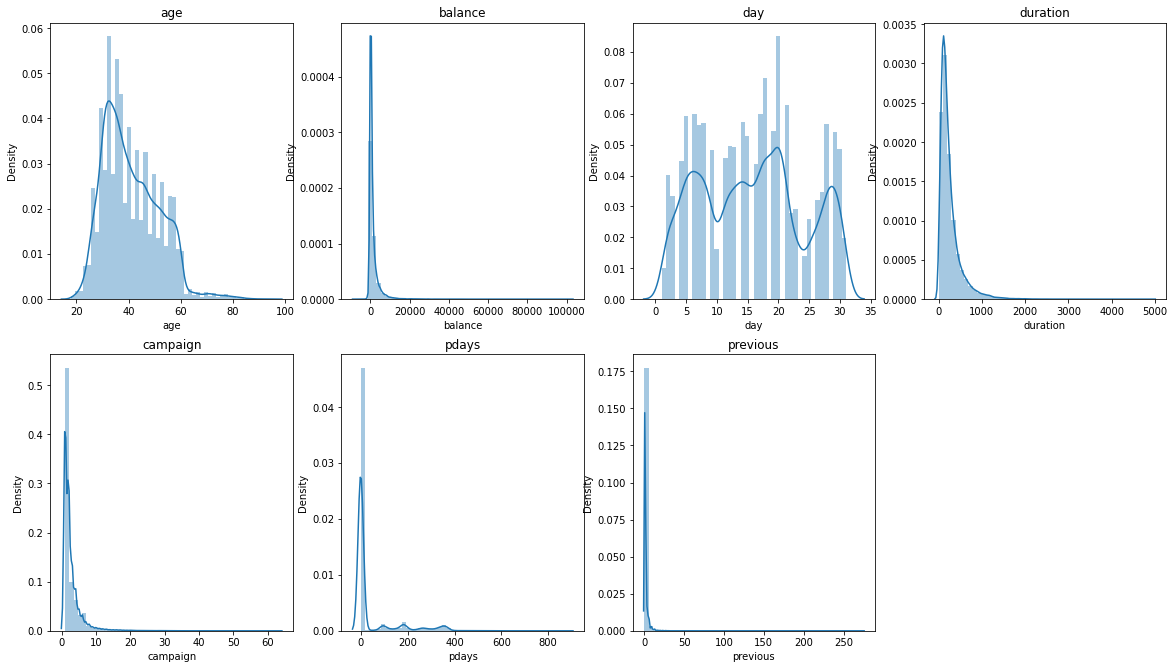

In [228]:
plt.figure(figsize=(20,60))
plotnumber =1
for numericalFeature in numericalFeatures:
    ax = plt.subplot(10,4,plotnumber)
    sns.distplot(data[numericalFeature])
    plt.xlabel(numericalFeature)
    plt.title(numericalFeature)
    plotnumber+=1
plt.show()

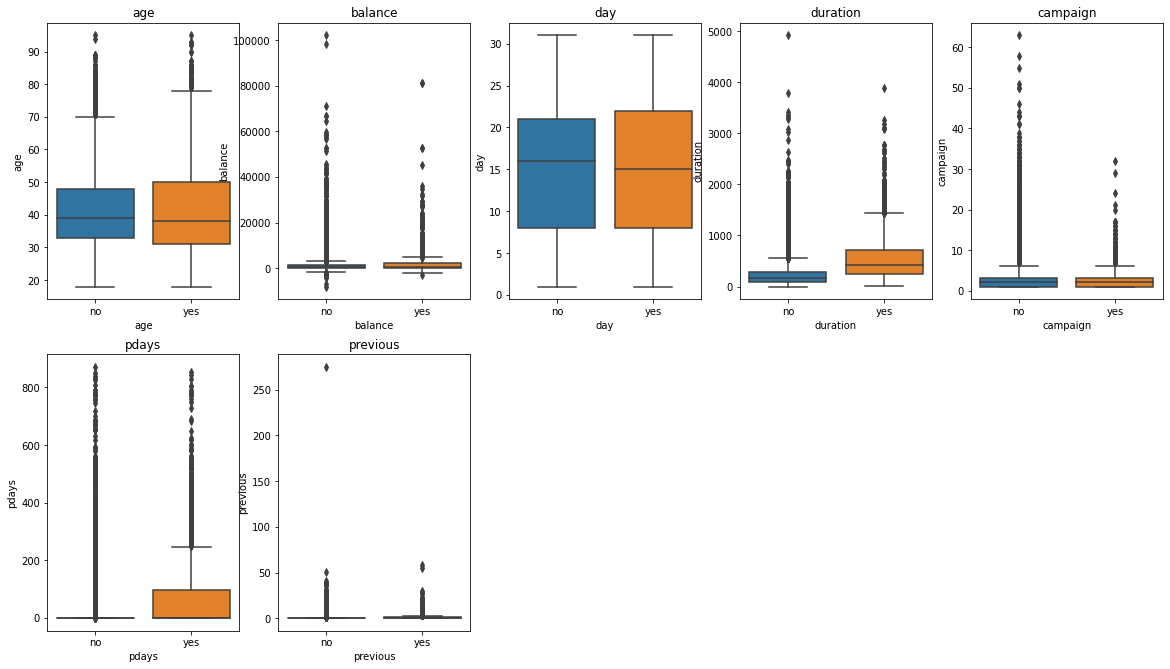

In [229]:
plt.figure(figsize=(20,60))
plotnumber =1
for numericalFeature in numericalFeatures:
    ax = plt.subplot(10,5,plotnumber)
    sns.boxplot(x='y', y=data[numericalFeature], data = data)
    plt.xlabel(numericalFeature)
    plt.title(numericalFeature)
    plotnumber+=1
plt.show()

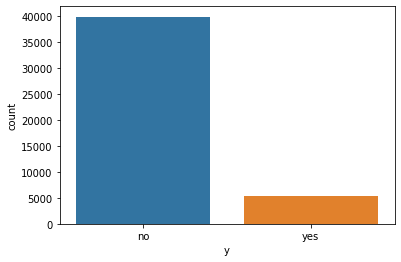

In [230]:
sns.countplot(x='y',data=data)
plt.show()

In [231]:
data2 =data.copy()
data2.shape

(45211, 17)

In [232]:
data2.groupby(['y','default']).size()

y    default
no   no         39159
     yes          763
yes  no          5237
     yes           52
dtype: int64

In [233]:
data2.drop(['default'],axis=1, inplace=True)

In [234]:
data2.drop(['pdays'],axis=1, inplace=True)

In [235]:
catagoricalColumns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  catagoricalColumns:
    data2 = pd.concat([data2.drop(col, axis=1),pd.get_dummies(data2[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)
     

In [236]:
boolColumns = ['housing', 'loan', 'y']
for col in  boolColumns:
    data2[col+'New']=data2[col].apply(lambda x : 1 if x == 'yes' else 0)
    data2.drop(col, axis=1, inplace=True)

In [237]:
data2

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housingNew,loanNew,yNew
0,58,2143,5,261,1,0,0,0,0,1,...,1,0,0,0,0,0,1,1,0,0
1,44,29,5,151,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
2,33,2,5,76,1,0,0,1,0,0,...,1,0,0,0,0,0,1,1,1,0
3,47,1506,5,92,1,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4,33,1,5,198,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
45207,71,1729,17,456,2,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
45208,72,5715,17,1127,5,3,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
45209,57,668,17,508,4,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [238]:
X = data2.drop(['yNew'],axis=1)
Y = data2['yNew']
trainX, testX, trainY, testY = train_test_split(X,Y,test_size=0.3, random_state=0)
print("Training data =",len(trainX), "\nTesting data =",len(testX))

Training data = 31647 
Testing data = 13564


In [239]:
from sklearn.svm import NuSVC

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
model_Nu_SVC = NuSVC(tol=0.001, class_weight=None, verbose=0, break_ties=False, coef0=0.0,decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',cache_size=200,probability=False, random_state=None, shrinking=True, nu=0.0005, max_iter=-1)
     

In [240]:
model_Nu_SVC.fit(trainX, trainY)

NuSVC(nu=0.0005, verbose=0)

In [241]:
predictY=model_Nu_SVC.predict(testX)

print(accuracy_score(testY,predictY))
print(confusion_matrix(testY,predictY))
print(classification_report(testY,predictY,digits=4))

0.6103656738425244
[[7735 4234]
 [1051  544]]
              precision    recall  f1-score   support

           0     0.8804    0.6463    0.7454     11969
           1     0.1139    0.3411    0.1707      1595

    accuracy                         0.6104     13564
   macro avg     0.4971    0.4937    0.4580     13564
weighted avg     0.7902    0.6104    0.6778     13564

